In [1]:
    import wget
    import os
    import zipfile
    
    import urllib3
    import certifi
    import sys
    import glob
    
    import numpy as np
    import pandas as pd
    
    import matplotlib.pyplot as plt
    
    %matplotlib inline


    import plotly.offline as py
    import plotly.graph_objs as go
    import plotly.tools as tls
    import seaborn as sns
    
    import plotly
    plotly.offline.init_notebook_mode()
  

C:\Program Files\Miniconda3\lib\site-packages\IPython\html.py:14: ShimWarning:

The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.



In [2]:
#from temperature import get_temperature_data

In [3]:
#get_temperature_data()

In [4]:
#from temperature import global_temp_country

In [5]:
#global_temp_country()

In [6]:
from temperature import remove_data

In [7]:
global_temp_country=pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [8]:
    global_temp_country_clean = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

    global_temp_country_clean = global_temp_country_clean.replace(
       ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
       ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [9]:
    #Let's average temperature for each country
    countries = np.unique(global_temp_country_clean['Country'])
    mean_temp = []
    for country in countries:
        mean_temp.append(global_temp_country_clean[global_temp_country_clean['Country'] ==
                                                   country]['AverageTemperature'].mean())

In [10]:
# creates a mercator projection of world map showing the average land temperature
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        text = countries,
        locationmode = 'country names',
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Average land temperature'),
      ) ]

layout = dict(
    title = 'Average land temperature by country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        showocean = True,
        oceancolor = 'rgb(10,200,255)',
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [11]:
    #create globe graph

    data = [ dict(
            type = 'choropleth',
            locations = countries,
            z = mean_temp,
            locationmode = 'country names',
            text = countries,
            marker = dict(
                line = dict(color = 'rgb(0,0,0)', width = 1)),
                colorbar = dict(autotick = True, tickprefix = '',
                title = '# Average\nTemperature,\n°C')
                )
           ]

    layout = dict(
        title = 'Average land temperature by countries',
        geo = dict(
            showframe = False,
            showocean = True,
            oceancolor = 'rgb(10,200,255)',
            projection = dict(
            type = 'orthographic',
                rotation = dict(
                        lon = 60,
                        lat = 10),
            ),
            lonaxis =  dict(
                    showgrid = True,
                    gridcolor = 'rgb(102, 102, 102)'
                ),
            lataxis = dict(
                    showgrid = True,
                    gridcolor = 'rgb(102, 102, 102)'
                    )
                ),
            )

    fig = dict(data=data, layout=layout)
    py.iplot(fig, validate=False, filename='worldmap')

In [12]:
global_temp = pd.read_csv("GlobalTemperatures.csv")

#Extract the year from a date
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(256, 100, 0)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 10, 0)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(0, 0, 200)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature of the world over the years',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [13]:
developing = ['India', 'Mexico', 'Turkey', 'South Africa', 'Brazil']
mean_temp_year_country = [ [0] * len(years[70:]) for i in range(len(developing))]
j = 0
for country in developing:
    all_temp_country = global_temp_country_clean[global_temp_country_clean['Country'] == country]
    i = 0
    for year in years[70:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']
for i in range(len(developing)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_year_country[i],
        mode='lines',
        name=developing[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature of developing countries',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

In [14]:
developed = ['United States','Russia']
mean_temp_country = [ [0] * len(years[70:]) for i in range(len(developed))]
j = 0
for country in developed:
    all_temp_country = global_temp_country_clean[global_temp_country_clean['Country'] == country]
    i = 0
    for year in years[70:]:
        mean_temp_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']
for i in range(len(developed)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_country[i],
        mode='lines',
        name=developed[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature of developed countries',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

In [15]:
compare = ['United States','China', 'Nepal']
mean_temp_country = [ [0] * len(years[70:]) for i in range(len(compare))]
j = 0
for country in compare:
    all_temp_country = global_temp_country_clean[global_temp_country_clean['Country'] == country]
    i = 0
    for year in years[70:]:
        mean_temp_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']
for i in range(len(compare)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_country[i],
        mode='lines',
        name=compare[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='comparing temperature rise between Industrial countries vs non industrial',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

In [28]:
bycities = pd.read_csv('GlobalLandTemperaturesByCity.csv', parse_dates=['dt'])
# there are some cities with the same name but in different countries 
bycities[['City', 'Country']].drop_duplicates()
bycities.City = bycities.City.str.cat(bycities.Country, sep=' ')
bycities = bycities[bycities.dt.dt.year >= 1900]
bycities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1874,1900-01-01,-0.989,0.588,Århus Denmark,Denmark,57.05N,10.33E
1875,1900-02-01,-2.799,0.882,Århus Denmark,Denmark,57.05N,10.33E
1876,1900-03-01,0.592,0.429,Århus Denmark,Denmark,57.05N,10.33E
1877,1900-04-01,4.630,0.417,Århus Denmark,Denmark,57.05N,10.33E
1878,1900-05-01,9.576,0.521,Århus Denmark,Denmark,57.05N,10.33E


In [29]:
city_means = bycities.groupby(['City', bycities.dt.dt.year])['AverageTemperature'].mean().unstack()
city_mins = bycities.groupby(['City', bycities.dt.dt.year])['AverageTemperature'].min().unstack()
city_maxs = bycities.groupby(['City', bycities.dt.dt.year])['AverageTemperature'].max().unstack()
city_means.head()

dt,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
City,,,,,,,,,,,,,,,,,,,,,
A Coruña Spain,13.267917,12.773417,12.828333,13.028167,13.349083,12.688000,13.107333,12.900583,13.235250,12.694667,...,13.928500,13.977667,14.540917,13.806167,13.682333,14.076167,13.946500,14.585500,13.625667,13.983750
Aachen Germany,9.132500,8.339750,8.133583,8.994000,8.987333,8.571083,8.877917,8.479833,8.108750,7.979000,...,9.657917,10.046333,10.471667,10.551833,9.863083,9.993750,8.703750,10.654667,9.788500,9.531500
Aalborg Denmark,7.375250,7.875667,6.542667,7.830833,7.577083,7.808917,8.229000,7.273000,7.796667,6.878167,...,8.919000,8.952333,9.514750,9.528583,9.628000,8.938667,6.965000,9.181167,8.399833,8.497625
Aba Nigeria,26.418833,26.455333,26.001750,25.875917,25.342083,26.315250,26.145000,26.029000,26.117500,26.082250,...,27.427333,27.422167,27.551083,27.551583,27.351583,27.631167,27.696667,27.388083,27.253500,27.513625
Abadan Iran,25.016167,25.770750,25.459083,24.242750,24.777750,24.393500,24.314667,23.778750,24.683250,25.284333,...,26.108583,25.901083,26.278583,26.281833,26.216917,26.392083,27.592833,26.019833,26.607833,27.095625


In [32]:
first_years_mean = city_means.iloc[:, :5].mean(axis=1) # mean temperature for the first 5 years
city_means_shifted = city_means.subtract(first_years_mean, axis=0)

def plot_temps(cities, city_ser, ax):
    first_years_mean = city_ser.iloc[:, :5].mean(axis=1)
    city_ser = city_ser.subtract(first_years_mean, axis=0)
    for city in random_cities:
        row = city_ser.loc[city]
        pd.stats.moments.ewma(row, 10).plot(label=row.name, ax=ax)
    ax.set_xlabel('')
    ax.legend(loc='best')



C:\Program Files\Miniconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning:

pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,com=10,adjust=True,min_periods=0).mean()



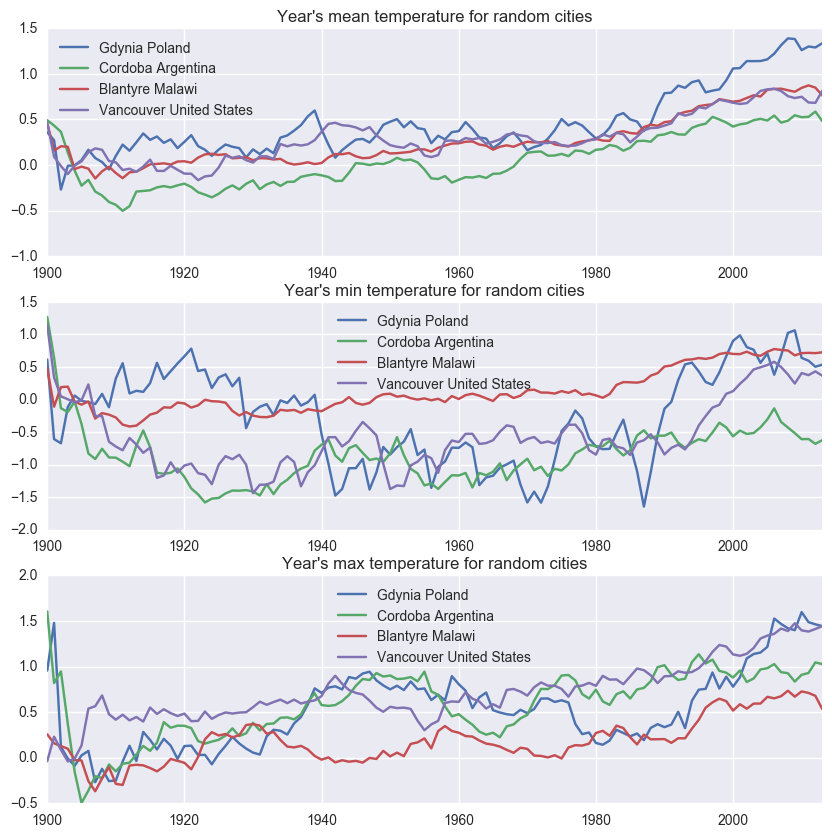

In [42]:
fig, axes = plt.subplots(3,1, figsize=(10,10))

n = 4
random_cities = city_means_shifted.sample(n).index

plot_temps(random_cities, city_means, axes[0])
plot_temps(random_cities, city_mins, axes[1])
plot_temps(random_cities, city_maxs, axes[2])

axes[0].set_title("Year's mean temperature for random cities")
axes[1].set_title("Year's min temperature for random cities")
axes[2].set_title("Year's max temperature for random cities")


In [40]:
globaltemp = pd.read_csv('GlobalTemperatures.csv', parse_dates=['dt'])
globaltemp.head(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN


C:\Program Files\Miniconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning:

pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,com=5,adjust=True,min_periods=0).mean()



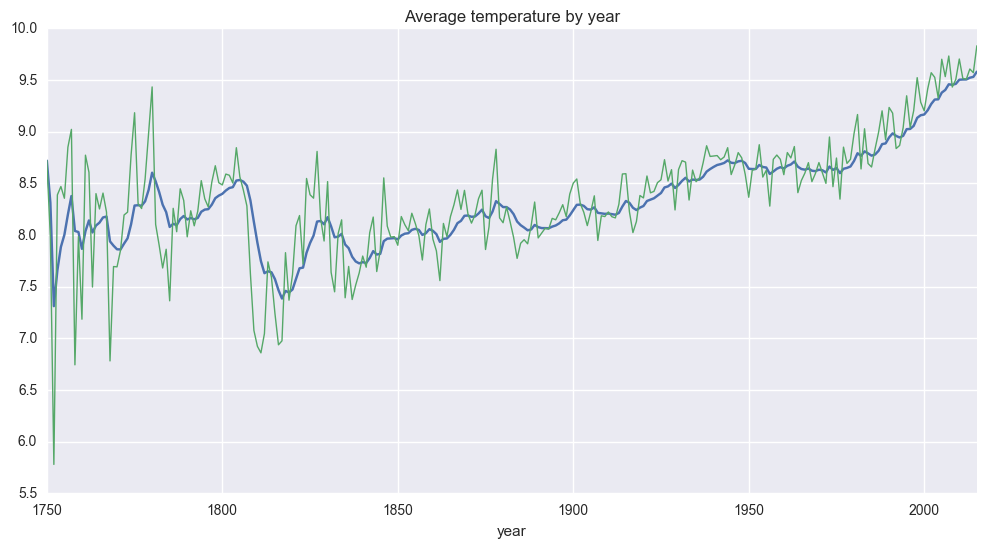

In [52]:
year_temp = globaltemp.groupby(globaltemp.dt.dt.year).mean()
plt.figure(figsize = (12, 6))
pd.stats.moments.ewma(year_temp.LandAverageTemperature,5).plot()
year_temp.LandAverageTemperature.plot(linewidth=1)
plt.title('Average temperature by year')
plt.xlabel('year')

In [21]:
#remove_data() 